In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [3]:
#reading the dataset
data1 = pd.read_csv("ready_data_pilau_1.csv")
data2 = pd.read_csv("ready_data_pilau_2.csv")

In [4]:
data = data1.append(data2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197 entries, 0 to 1095
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2197 non-null   object 
 1   Max Temp         2197 non-null   int64  
 2   Avg Temp         2197 non-null   float64
 3   Min Temp         2197 non-null   int64  
 4   Max Dew          2197 non-null   int64  
 5   Avg Dew          2197 non-null   float64
 6   Min Dew          2197 non-null   int64  
 7   Max Humid        2197 non-null   int64  
 8   Avg Humid        2197 non-null   float64
 9   Min Humid        2197 non-null   int64  
 10  Max Wind         2197 non-null   int64  
 11  Avg Wind         2197 non-null   float64
 12  Min Wind         2197 non-null   int64  
 13  Max Pres         2197 non-null   float64
 14  revenue          2197 non-null   float64
 15  Avg Pres         2197 non-null   float64
 16  Min Pres         2197 non-null   float64
 17  Rainfall      

In [6]:
data.to_csv("data_final.csv")

In [6]:
#changing the variables to appropriate types
data["weekday"] = data["weekday"].astype("category")
data["weekend"] = data["weekend"].astype("category")
data["offday"]  = data["offday"].astype("category")
data["month"]   = data["month"].astype("category")
data["offday_tomorrow"] = data["offday_tomorrow"].astype("category")

In [7]:
data["Rainfall"] = data["Rainfall"] + 1
data["delta_days"] = data["delta_days"] + 1
data["delta_months"] = data["delta_months"] + 1
data["delta_years"] = data["delta_years"] + 1
data["Temp Range"] = data["Max Temp"] - data["Min Temp"] 
data["Dew Range"] = data["Max Dew"] - data["Min Dew"]
data["Wind Range"] = data["Max Wind"] - data["Min Wind"]
data["Humid Range"] = data["Max Humid"] - data["Min Humid"]
data["Pres Range"] = data["Max Pres"] - data["Min Pres"] + 1

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197 entries, 0 to 1095
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   date             2197 non-null   object  
 1   Max Temp         2197 non-null   int64   
 2   Avg Temp         2197 non-null   float64 
 3   Min Temp         2197 non-null   int64   
 4   Max Dew          2197 non-null   int64   
 5   Avg Dew          2197 non-null   float64 
 6   Min Dew          2197 non-null   int64   
 7   Max Humid        2197 non-null   int64   
 8   Avg Humid        2197 non-null   float64 
 9   Min Humid        2197 non-null   int64   
 10  Max Wind         2197 non-null   int64   
 11  Avg Wind         2197 non-null   float64 
 12  Min Wind         2197 non-null   int64   
 13  Max Pres         2197 non-null   float64 
 14  revenue          2197 non-null   float64 
 15  Avg Pres         2197 non-null   float64 
 16  Min Pres         2197 non-null   float64 


####  Train Test Validation Split

In [9]:
data["date"] = pd.to_datetime(data["date"])
data["year"] = data["date"].dt.year

In [10]:
validation = data[data["year"] == 2019].reset_index(drop = True)

In [11]:
validation.tail()

,date,Max Temp,Avg Temp,Min Temp,Max Dew,Avg Dew,Min Dew,Max Humid,Avg Humid,Min Humid,...,delta_days,delta_months,delta_weeks,delta_years,restaurant_code,Temp Range,Dew Range,Wind Range,Humid Range,Pres Range
415,2019-07-29,77,69.5,59,57,53.7,50,82,58.1,39,...,1159,39,165,4,b,18,7,11,43,1.1
416,2019-07-30,70,66.5,64,61,58.2,55,88,74.8,60,...,1160,39,165,4,b,6,6,15,28,1.2
417,2019-08-01,77,68.9,61,59,55.7,52,82,63.7,47,...,1162,39,165,4,b,16,7,5,35,1.0
418,2019-08-02,77,68.2,61,61,58.0,54,94,71.8,47,...,1163,39,166,4,b,16,7,12,47,1.1
419,2019-08-03,75,68.3,63,61,57.7,55,88,70.3,50,...,1164,39,166,4,b,12,6,8,38,1.1


In [12]:
data = data[~(data["year"] == 2019)].reset_index(drop = True)

In [13]:
y = data["Quantity"]
X = data.drop("Quantity", 1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

In [16]:
X_test.to_csv("test_set_with_date.csv")

In [18]:
validation.to_csv("validation_with_date.csv")

## Machine Learning Begins

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer

num_attribs = ["Max Temp","Min Temp","Avg Temp","Temp Range", "Avg Dew","Max Dew","Min Dew","Dew Range", 
               "Avg Humid","Max Humid","Min Humid", "Humid Range", "Wind Range",
               "Avg Wind","Min Wind","Max Wind", "Rainfall", "delta_days",
               "delta_months", "delta_years"]
cat_attribs = ["weekday", "weekend", "offday", "offday_tomorrow", "month"]

In [16]:
#setting up the numerical pipeline
num_pipeline = Pipeline([
    ("std_scaler", SimpleImputer(strategy="median")),
])

In [17]:
#setting up the full_pipeline

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [18]:
X_train_prep = full_pipeline.fit_transform(X_train) 
X_test_prep  = full_pipeline.transform(X_test)

-------------------------------------------------------------------------------------

### Training a Multiple Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV

lr = LinearRegression()

lr.fit(X_train_prep, y_train)

LinearRegression()

In [25]:
train_preds = lr.predict(X_train_prep)
test_preds  = lr.predict(X_test_prep)

In [26]:
train = {"actual": y_train, "prediction": train_preds}
train = pd.DataFrame(data = train)

test  = {"actual": y_test, "prediction": test_preds}
test  = pd.DataFrame(data = test)

train["residual"] = train["actual"] - train["prediction"]
test["residual"]  = test["actual"] - test["prediction"]

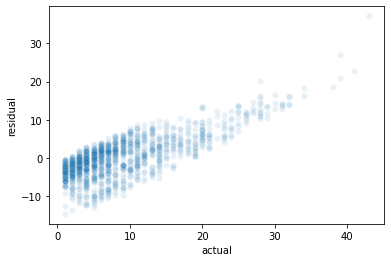

In [27]:
sns.scatterplot(data = train, x = "actual", y = "residual", alpha = 0.1)

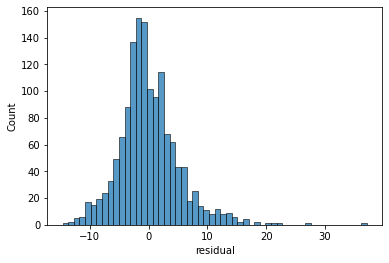

In [28]:
sns.histplot(data = train, x = "residual")

In [46]:
lr.score(X_test_prep, y_test)

0.47038415888938967

In [31]:
test["residual"].describe()

count    356.000000
mean       0.320481
std        4.954800
min      -12.242240
25%       -2.733756
50%       -0.354056
75%        2.809671
max       22.316354
Name: residual, dtype: float64

# Training Support Vector Machine

In [46]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr.fit(X_train_prep, y_train)

In [27]:
train_preds = svr.predict(X_train_prep)
test_preds  = svr.predict(X_test_prep)

In [28]:
train = {"actual": y_train, "prediction": train_preds}
train = pd.DataFrame(data = train)

test  = {"actual": y_test, "prediction": test_preds}
test  = pd.DataFrame(data = test)

train["residual"] = train["actual"] - train["prediction"]
test["residual"]  = test["actual"] - test["prediction"]

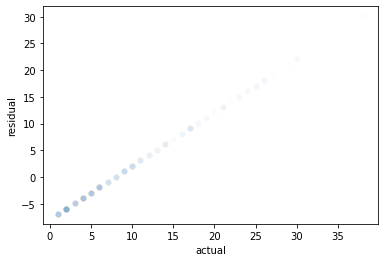

In [32]:
sns.scatterplot(data = test, x = "actual", y = "residual", alpha = 0.01)

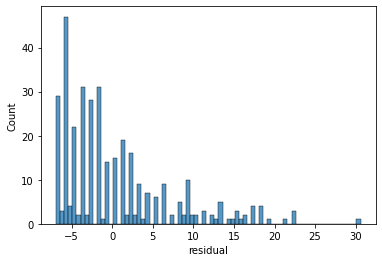

In [34]:
sns.histplot(data = test, x = "residual", binwidth= 0.5)

## Training an Ensemble Model

In [46]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ('lr', LinearRegression()),
    ('rf', GradientBoostingRegressor(learning_rate=0.1, n_estimators=35, random_state=42))
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator= RandomForestRegressor()
)

In [47]:
reg.fit(X_train_prep, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               GradientBoostingRegressor(n_estimators=35,
                                                         random_state=42))],
                  final_estimator=RandomForestRegressor())

In [179]:
train_preds = reg.predict(X_train_prep)
test_preds  = reg.predict(X_test_prep)

In [180]:
train = {"actual": y_train, "prediction": train_preds}
train = pd.DataFrame(data = train)

test  = {"actual": y_test, "prediction": test_preds}
test  = pd.DataFrame(data = test)

train["prediction"] = train["prediction"].apply(np.round)
test["prediction"]  = test["prediction"].apply(np.round)

train["residual"] = train["actual"] - train["prediction"]
test["residual"]  = test["actual"] - test["prediction"]

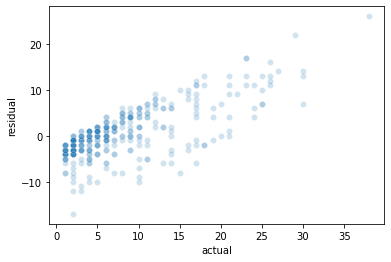

In [181]:
sns.scatterplot(data = test, x = "actual", y = "residual", alpha = 0.2)

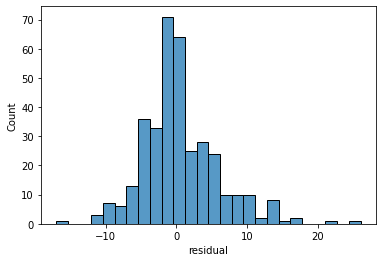

In [182]:
sns.histplot(data = test, x = "residual")

In [183]:
reg.score(X_test_prep, y_test)

0.3513483037391223

In [184]:
mean_confidence_interval(test["residual"], confidence=0.95)

(0.5589887640449438, -0.010034478620334242, 1.1280120067102217)

### Training a Boosted Model

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
rf = RandomForestRegressor(n_estimators=27)
rf.fit(X_train_prep, y_train)

RandomForestRegressor(n_estimators=27)

In [71]:
train_preds = rf.predict(X_train_prep)
test_preds  = rf.predict(X_test_prep)

In [72]:
train = {"actual": y_train, "prediction": train_preds}
train = pd.DataFrame(data = train)

test  = {"actual": y_test, "prediction": test_preds}
test  = pd.DataFrame(data = test)

train["prediction"] = train["prediction"].apply(np.round)
test["prediction"]  = test["prediction"].apply(np.round)

train["residual"] = train["actual"] - train["prediction"]
test["residual"]  = test["actual"] - test["prediction"]





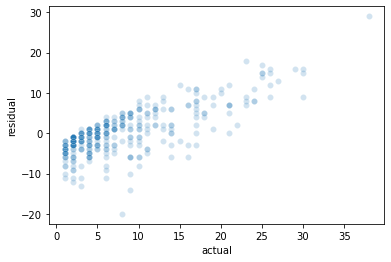

In [73]:
sns.scatterplot(data = test, x = "actual", y = "residual", alpha = 0.2)

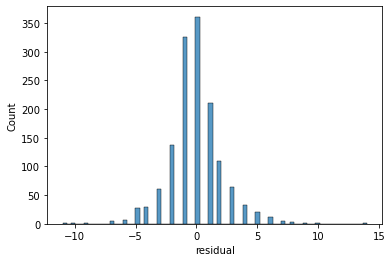

In [74]:
sns.histplot(data = train, x = "residual")

In [75]:
rf.score(X_test_prep, y_test)

0.30204017828828256

In [192]:
test.to_csv("results.csv")

In [193]:
test

,actual,prediction,residual
1499,14,15.0,-1.0
1684,6,5.0,1.0
251,4,10.0,-6.0
449,4,4.0,0.0
894,16,9.0,7.0
...,...,...,...
1734,25,11.0,14.0
879,6,11.0,-5.0
197,2,8.0,-6.0
241,1,10.0,-9.0


## Running on the Validation Set

In [35]:
# Preparing the validation set

y_val = validation["Quantity"]
X_val = validation.drop("Quantity", 1)

X_val_prep = full_pipeline.transform(X_val)

In [36]:
val_preds = svr.predict(X_val_prep)

In [37]:
val  = {"actual": y_val, "prediction": val_preds}
val  = pd.DataFrame(data = val)

val["prediction"] = val["prediction"].apply(np.round)
val["residual"]  = val["actual"] - val["prediction"]
val["restaurant"] = validation["restaurant_code"]

In [38]:
val["week"] = np.ceil(val.index / 7)

In [44]:
val.to_csv("val.csv")

In [39]:
val["date"] = validation["date"]

In [40]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             420 non-null    datetime64[ns]
 1   Max Temp         420 non-null    int64         
 2   Avg Temp         420 non-null    float64       
 3   Min Temp         420 non-null    int64         
 4   Max Dew          420 non-null    int64         
 5   Avg Dew          420 non-null    float64       
 6   Min Dew          420 non-null    int64         
 7   Max Humid        420 non-null    int64         
 8   Avg Humid        420 non-null    float64       
 9   Min Humid        420 non-null    int64         
 10  Max Wind         420 non-null    int64         
 11  Avg Wind         420 non-null    float64       
 12  Min Wind         420 non-null    int64         
 13  Max Pres         420 non-null    float64       
 14  revenue          420 non-null    float64  

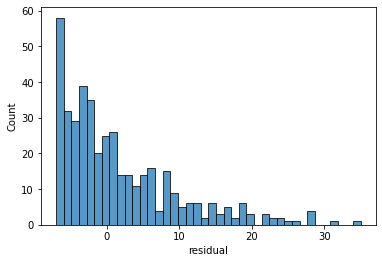

In [41]:
g = sns.histplot(data = val, x = val["residual"], bins = 40)
#g.set_xlim(-300, 100)

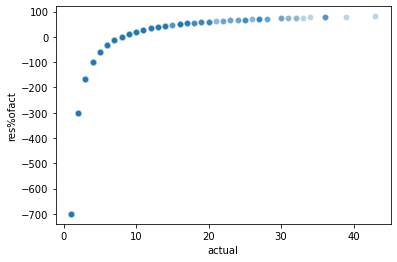

In [45]:
g = sns.scatterplot(data = val, x = "actual", y = "res%ofact", alpha = 0.3)
#g.set_ylim(-200, 100)
#g.set_xlim(-5, 30)

In [43]:
val["res%ofact"] = val["residual"]/val["actual"]*100

In [44]:
val["res%ofact"].describe()

count    420.000000
mean     -76.947457
std      191.192400
min     -700.000000
25%     -100.000000
50%      -14.285714
75%       38.461538
max       81.395349
Name: res%ofact, dtype: float64

# Grid Search CV 

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': list(range(10,40, 5)), 'max_features': list(range(3,20, 3))},
{'bootstrap': [False], 'n_estimators': list(range(20,40,5)), 'max_features': list(range(3,20,3))},
]

In [77]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose = 10)

In [78]:
grid_search.fit(X_train_prep, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_features=3, n_estimators=10 .................................
[CV]  max_features=3, n_estimators=10, score=(train=-6.412, test=-34.296), total=   0.0s
[CV] max_features=3, n_estimators=10 .................................
[CV]  max_features=3, n_estimators=10, score=(train=-5.770, test=-44.467), total=   0.0s
[CV] max_features=3, n_estimators=10 .................................
[CV]  max_features=3, n_estimators=10, score=(train=-6.625, test=-42.336), total=   0.1s
[CV] max_features=3, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=3, n_estimators=10, score=(train=-6.527, test=-32.843), total=   0.1s
[CV] max_features=3, n_estimators=10 .................................
[CV]  max_features=3, n_estimators=10, score=(train=-6.215, test=-34.032), total=   0.0s
[CV] max_features=3, n_estimators=15 .................................
[CV]  max_features=3, n_estimators=15, score=(train=-5.582, test=-34.848), total=   0.1s
[CV] max_features=3, n_estimators=15 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=3, n_estimators=15, score=(train=-5.370, test=-40.057), total=   0.1s
[CV] max_features=3, n_estimators=15 .................................
[CV]  max_features=3, n_estimators=15, score=(train=-5.597, test=-39.129), total=   0.0s
[CV] max_features=3, n_estimators=15 .................................
[CV]  max_features=3, n_estimators=15, score=(train=-6.245, test=-34.301), total=   0.1s
[CV] max_features=3, n_estimators=15 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV]  max_features=3, n_estimators=15, score=(train=-5.906, test=-34.976), total=   0.1s
[CV] max_features=3, n_estimators=20 .................................
[CV]  max_features=3, n_estimators=20, score=(train=-5.386, test=-36.514), total=   0.1s
[CV] max_features=3, n_estimators=20 .................................
[CV]  max_features=3, n_estimators=20, score=(train=-5.547, test=-41.049), total=   0.1s
[CV] max_features=3, n_estimators=20 .................................
[CV]  max_features=3, n_estimators=20, score=(train=-5.630, test=-41.515), total=   0.1s
[CV] max_features=3, n_estimators=20 .................................
[CV]  max_features=3, n_estimators=20, score=(train=-6.163, test=-31.133), total=   0.1s
[CV] max_features=3, n_estimators=20 .................................
[CV]  max_features=3, n_estimators=20, score=(train=-5.460, test=-29.422), total=   0.1s
[CV] max_features=3, n_estimators=25 .................................
[CV]  max_features=3, n_estimators=25, s

[CV]  max_features=9, n_estimators=10, score=(train=-6.080, test=-40.969), total=   0.1s
[CV] max_features=9, n_estimators=10 .................................
[CV]  max_features=9, n_estimators=10, score=(train=-6.213, test=-39.315), total=   0.1s
[CV] max_features=9, n_estimators=10 .................................
[CV]  max_features=9, n_estimators=10, score=(train=-6.891, test=-31.402), total=   0.1s
[CV] max_features=9, n_estimators=10 .................................
[CV]  max_features=9, n_estimators=10, score=(train=-7.010, test=-35.624), total=   0.1s
[CV] max_features=9, n_estimators=15 .................................
[CV]  max_features=9, n_estimators=15, score=(train=-5.845, test=-35.352), total=   0.1s
[CV] max_features=9, n_estimators=15 .................................
[CV]  max_features=9, n_estimators=15, score=(train=-5.716, test=-41.107), total=   0.1s
[CV] max_features=9, n_estimators=15 .................................
[CV]  max_features=9, n_estimators=15, s

[CV]  max_features=12, n_estimators=30, score=(train=-5.242, test=-29.734), total=   0.3s
[CV] max_features=12, n_estimators=30 ................................
[CV]  max_features=12, n_estimators=30, score=(train=-5.225, test=-31.210), total=   0.3s
[CV] max_features=12, n_estimators=35 ................................
[CV]  max_features=12, n_estimators=35, score=(train=-5.053, test=-33.672), total=   0.3s
[CV] max_features=12, n_estimators=35 ................................
[CV]  max_features=12, n_estimators=35, score=(train=-5.041, test=-38.027), total=   0.3s
[CV] max_features=12, n_estimators=35 ................................
[CV]  max_features=12, n_estimators=35, score=(train=-4.994, test=-40.322), total=   0.3s
[CV] max_features=12, n_estimators=35 ................................
[CV]  max_features=12, n_estimators=35, score=(train=-5.323, test=-29.407), total=   0.3s
[CV] max_features=12, n_estimators=35 ................................
[CV]  max_features=12, n_estimator

[CV]  max_features=18, n_estimators=20, score=(train=-5.385, test=-31.058), total=   0.2s
[CV] max_features=18, n_estimators=25 ................................
[CV]  max_features=18, n_estimators=25, score=(train=-5.111, test=-33.466), total=   0.3s
[CV] max_features=18, n_estimators=25 ................................
[CV]  max_features=18, n_estimators=25, score=(train=-5.040, test=-39.440), total=   0.3s
[CV] max_features=18, n_estimators=25 ................................
[CV]  max_features=18, n_estimators=25, score=(train=-4.808, test=-38.921), total=   0.3s
[CV] max_features=18, n_estimators=25 ................................
[CV]  max_features=18, n_estimators=25, score=(train=-5.326, test=-29.163), total=   0.3s
[CV] max_features=18, n_estimators=25 ................................
[CV]  max_features=18, n_estimators=25, score=(train=-5.250, test=-30.317), total=   0.3s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimator

[CV]  bootstrap=False, max_features=6, n_estimators=30, score=(train=-0.000, test=-51.356), total=   0.2s
[CV] bootstrap=False, max_features=6, n_estimators=30 ................
[CV]  bootstrap=False, max_features=6, n_estimators=30, score=(train=-0.000, test=-35.120), total=   0.2s
[CV] bootstrap=False, max_features=6, n_estimators=30 ................
[CV]  bootstrap=False, max_features=6, n_estimators=30, score=(train=-0.000, test=-38.110), total=   0.2s
[CV] bootstrap=False, max_features=6, n_estimators=35 ................
[CV]  bootstrap=False, max_features=6, n_estimators=35, score=(train=-0.003, test=-38.429), total=   0.3s
[CV] bootstrap=False, max_features=6, n_estimators=35 ................
[CV]  bootstrap=False, max_features=6, n_estimators=35, score=(train=-0.000, test=-52.734), total=   0.3s
[CV] bootstrap=False, max_features=6, n_estimators=35 ................
[CV]  bootstrap=False, max_features=6, n_estimators=35, score=(train=-0.000, test=-50.666), total=   0.3s
[CV] boot

[CV]  bootstrap=False, max_features=12, n_estimators=35, score=(train=-0.000, test=-35.479), total=   0.4s
[CV] bootstrap=False, max_features=15, n_estimators=20 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=20, score=(train=-0.000, test=-37.663), total=   0.3s
[CV] bootstrap=False, max_features=15, n_estimators=20 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=20, score=(train=-0.000, test=-45.466), total=   0.3s
[CV] bootstrap=False, max_features=15, n_estimators=20 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=20, score=(train=-0.000, test=-50.289), total=   0.3s
[CV] bootstrap=False, max_features=15, n_estimators=20 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=20, score=(train=-0.000, test=-33.335), total=   0.3s
[CV] bootstrap=False, max_features=15, n_estimators=20 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=20, score=(train=-0.000, test=-36.197), total=   0.3s
[CV

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=27),
             param_grid=[{'max_features': [3, 6, 9, 12, 15, 18],
                          'n_estimators': [10, 15, 20, 25, 30, 35]},
                         {'bootstrap': [False],
                          'max_features': [3, 6, 9, 12, 15, 18],
                          'n_estimators': [20, 25, 30, 35]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=10)

In [79]:
train_preds = grid_search.predict(X_train_prep)
test_preds  = grid_search.predict(X_test_prep)

In [80]:
train = {"actual": y_train, "prediction": train_preds}
train = pd.DataFrame(data = train)

test  = {"actual": y_test, "prediction": test_preds}
test  = pd.DataFrame(data = test)

train["prediction"] = train["prediction"].apply(np.round)
test["prediction"]  = test["prediction"].apply(np.round)

train["residual"] = train["actual"] - train["prediction"]
test["residual"]  = test["actual"] - test["prediction"]

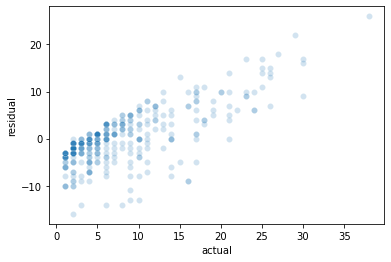

In [81]:
sns.scatterplot(data = test, x = "actual", y = "residual", alpha = 0.2)

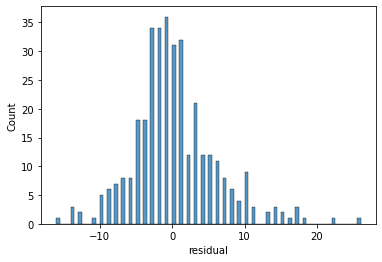

In [82]:
sns.histplot(data = test, x = "residual", binwidth = 0.5)

In [65]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [108]:
test

,actual,prediction,residual
1499,14,17.0,-3.0
1684,6,5.0,1.0
251,4,10.0,-6.0
449,4,4.0,0.0
894,16,8.0,8.0
...,...,...,...
1734,25,13.0,12.0
879,6,12.0,-6.0
197,2,10.0,-8.0
241,1,8.0,-7.0


In [122]:
test.to_csv("test_res.csv")

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 1499 to 1671
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   actual      356 non-null    int64  
 1   prediction  356 non-null    float64
 2   residual    356 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.1 KB


In [ ]:
data

In [100]:
grid_search.score(X_test_prep, y_test)

-33.93361657303371

In [98]:
lr.score??

In [101]:
validation

,date,Max Temp,Avg Temp,Min Temp,Max Dew,Avg Dew,Min Dew,Max Humid,Avg Humid,Min Humid,...,delta_months,delta_weeks,delta_years,restaurant_code,Temp Range,Dew Range,Wind Range,Humid Range,Pres Range,year
0,2019-01-01,52,48.6,43,45,39.9,32,82,71.7,61,...,35,146,3,a,9,13,9,21,1.2,2019
1,2019-01-02,43,42.4,41,36,34.2,32,81,72.5,66,...,35,146,3,a,2,4,5,15,1.1,2019
2,2019-01-03,43,41.3,37,36,32.0,28,81,70.1,57,...,35,146,3,a,6,8,5,24,1.0,2019
3,2019-01-04,41,38.5,36,34,29.6,27,81,70.4,61,...,35,146,3,a,5,7,9,20,1.1,2019
4,2019-01-05,45,42.3,41,36,33.8,32,76,71.9,66,...,35,146,3,a,4,4,4,10,1.1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2019-07-29,77,69.5,59,57,53.7,50,82,58.1,39,...,39,165,4,b,18,7,11,43,1.1,2019
416,2019-07-30,70,66.5,64,61,58.2,55,88,74.8,60,...,39,165,4,b,6,6,15,28,1.2,2019
417,2019-08-01,77,68.9,61,59,55.7,52,82,63.7,47,...,39,165,4,b,16,7,5,35,1.0,2019
418,2019-08-02,77,68.2,61,61,58.0,54,94,71.8,47,...,39,166,4,b,16,7,12,47,1.1,2019
